# Car-mpg

In [95]:
include("RealWorldData.ji")
using Plots

In [96]:
X, Z, y, zmap = get_cardata()
y = y ./(maximum(y) - minimum(y)) 
y = y .- mean(y)
zmap

1-element Vector{Any}:
 Dict{Any, Any}(2 => [0, 0], 3 => [0, 1], 1 => [1, 0])

In [97]:
ntrain = 260
ntest = 392 - ntrain
indr, indt = get_train_index(Z, ntrain)

Xr, Zr, yr = X[indr, :], Z[indr, :], y[indr]
Xt, Zt, yt = X[indt, :], Z[indt, :], y[indt]
width_exp1 = -0.2
width_exp5 = -0.2
width_exp9 = -0.2

# car_model9 = qgplsim.model(Xr, Zr, yr, [0.75], width_exp9)
# car_model1 = qgplsim.model(Xr, Zr, yr, [0.25], width_exp1)
car_model5 = qgplsim.model(Xr, Zr, yr, [0.5], width_exp5)
# qgplsim.estimator(car_model9)
# qgplsim.estimator(car_model1)
qgplsim.estimator(car_model5)

# qgplsim.print_model(car_model1)
# qgplsim.print_model(car_model5)
# qgplsim.print_model(car_model9)

carmodel = car_model5
vv = Xt * carmodel.theta + Zt * carmodel.gamma
ylx = Xt * carmodel.alpha
ylz = Zt * carmodel.beta
gv = qgplsim.predict(carmodel, Xt, Zt)
yp = gv + ylx + ylz

qgplsim.print_model(carmodel)

┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitq

alpha => [0.0303, -0.0491, -0.0089, -0.0887]
theta => [0.8664, -0.2258, 0.1926, 0.4016]
gamma => [-0.0396, -0.1545]
beta => [0.0329, 0.06]


In [98]:
rmsd(yp, yt)

0.09170173451124539

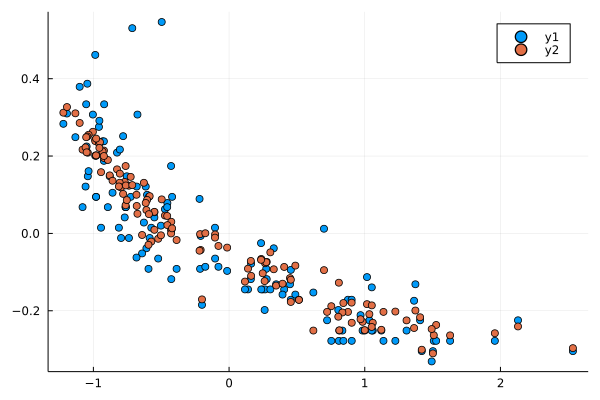

In [99]:
scatter(vv, yt)
scatter!(vv, yp)

theta => [-0.1026, -0.0012, -0.0413, -0.04]
beta => [-0.3599, -0.2696]


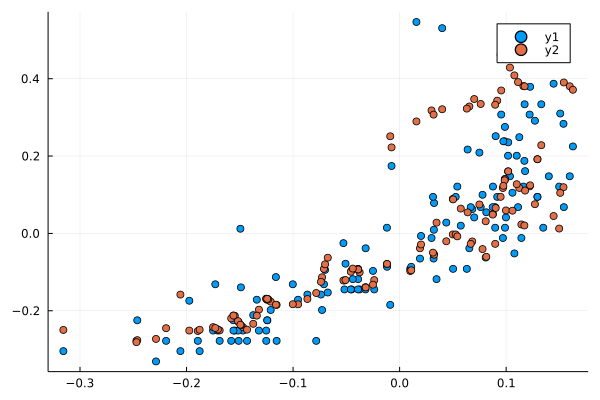

In [100]:
include("./src/semi_mave.ji")
car_model_mr = semiMAVE.model(Xr, Zr, yr)
semiMAVE.estimator(car_model_mr)   
semiMAVE.print_model(car_model_mr)
gvm, = semiMAVE.predictor(car_model_mr, Xt, Zt)
ypm = gvm  + Zt * car_model_mr.β

vv = Xt * car_model_mr.θ
scatter(vv, yt)
scatter!(vv, ypm)

In [101]:
rmsd(ypm, yt)

0.15924500232905384

#  California Housing

In [102]:
include("./src/supportFunctions.ji")
include("./src/qgplsim.ji")
# include("./src/semi_mave.ji")
include("RealWorldData.ji")
using Plots


In [103]:

Xa, Za, ya = califdata(4.035) # a for all
Z, zmap = categ_binary(Za) # [:, 1]
zmap

2-element Vector{Any}:
 Dict{Any, Any}(2 => [1], 1 => [0])
 Dict{Any, Any}("NEAR BAY" => [1, 0, 0], "INLAND" => [0, 0, 1], "NEAR OCEAN" => [0, 0, 0], "<1H OCEAN" => [0, 1, 0])

## One Single Simulation

In [104]:
Xa, Za, ya = califdata(4.035) # a for all
n = length(ya)

X = scaler(Xa, 1)
y = ya ./(maximum(ya) - minimum(ya)) 
y = y .- mean(y)
Z, zmap = categ_binary(Za) # [:, 1]

ntrain = 2000
ntest = 1000
indr, indt = get_train_index(Z, ntrain)

indt = indt[shuffle(1:(n - ntrain))[1:ntest]]
ntest = length(indt)
Xr = X[indr, :]
yr = y[indr] 
Zr = Z[indr, :]

Xt = X[indt, :]
yt = y[indt]  
Zt = Z[indt, :]
sum(Zr, dims = 1)

1×4 Matrix{Float64}:
 841.0  224.0  890.0  629.0

In [105]:
# include("./src/qgplsim.ji")
width_exp = -0.2
dy = 0
method = "qr"
qsmodel = qgplsim.model(Xr, Zr, yr, [0.5], width_exp)
qsmodel1 = qgplsim.model(Xr, Zr, yr, [0.1], width_exp)
qsmodel9 = qgplsim.model(Xr, Zr, yr, [0.9], width_exp)


@time qgplsim.estimator(qsmodel)
@time qgplsim.estimator(qsmodel1)
@time qgplsim.estimator(qsmodel9)

vv = Xt * qsmodel.theta
ylx = Xt * qsmodel.alpha
ylz = Zt * qsmodel.beta
gv = qgplsim.predict(qsmodel, Xt, Zt, dy, method)
yp = gv + ylx  + ylz

vv1 = Xt * qsmodel1.theta
ylx1 = Xt * qsmodel1.alpha
ylz1 = Zt * qsmodel1.beta
gv1 = qgplsim.predict(qsmodel1, Xt, Zt, dy, method)
yp1 = gv1 + ylx1  + ylz1

vv9 = Xt * qsmodel9.theta
ylx9 = Xt * qsmodel9.alpha
ylz9 = Zt * qsmodel9.beta
gv9 = qgplsim.predict(qsmodel9, Xt, Zt, dy, method)
yp9 = gv9 + ylx9  + ylz9


qgplsim.print_model(qsmodel)

  8.429416 seconds (36.40 M allocations: 3.415 GiB, 4.62% gc time, 6.05% compilation time)
  6.893742 seconds (34.83 M allocations: 3.322 GiB, 4.19% gc time)
  7.198408 seconds (34.83 M allocations: 3.321 GiB, 4.07% gc time)
alpha => [-0.0301, 0.0286, 0.083]
theta => [0.2265, -0.8927, 0.3897]
gamma => [0.0033, 0.2134, -0.0199, -0.5345]
beta => [-0.0121, -0.0579, -0.003, -0.0869]


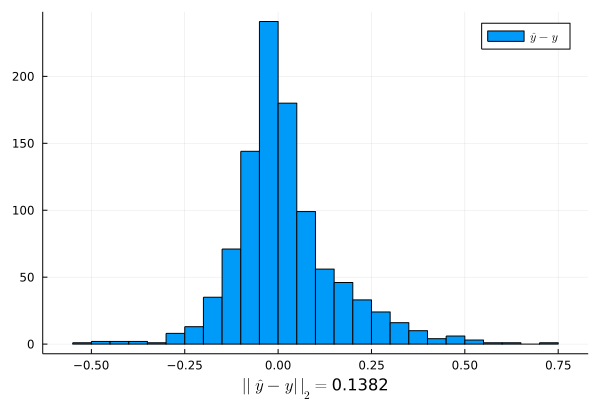

In [106]:
using LaTeXStrings
e = round(rmsd(yp, yt), digits = 4)
str = string(L"||\hat{y} - y||_2 = ", "$e")
histogram(yt .- yp, label = L"\hat{y} - y")
xlabel!(str)

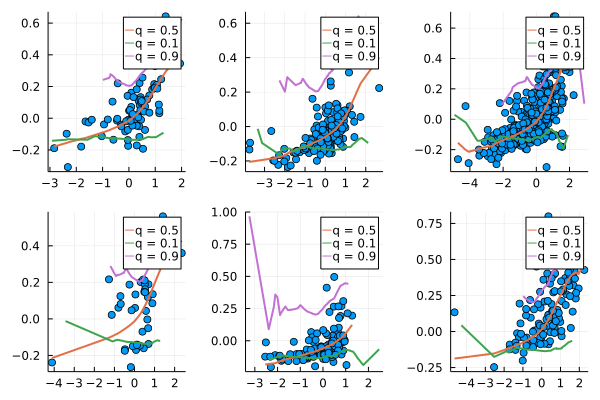

In [108]:
fig = plot(layouts = (2,3))
categ, index = collection(Zt)
for k in 1:6
    pk = fig.subplots[k]
    zk = categ[k]
    indk = index[zk]
    
    vk = vv[indk]
    vk1 = vv1[indk]
    vk9 = vv9[indk]
    
    ypk = gv[indk]
    yp1k = gv1[indk]
    yp9k = gv9[indk]
    
    ytk = yt[indk] - ylx[indk] - ylz[indk]
    ytk1 = yt[indk] - ylx1[indk] - ylz1[indk]
    ytk9 = yt[indk] - ylx9[indk] - ylz9[indk]

    sort_ind = sortperm(vk)
    sort_ind1 = sortperm(vk1)
    sort_ind9 = sortperm(vk9)

    scatter!(pk, vk, ytk, label = false)
    plot!(pk, vk[sort_ind], ypk[sort_ind], width = 2, label = "q = 0.5")
    plot!(pk, vk1[sort_ind1], yp1k[sort_ind1], width = 2, label = "q = 0.1")
    plot!(pk, -vk9[sort_ind9], yp9k[sort_ind9], width = 2, label = "q = 0.9")

end
fig

In [109]:
include("./src/semi_mave.ji")
car_model_mr = semiMAVE.model(Xr, Zr, yr)
@time semiMAVE.estimator(car_model_mr) 
semiMAVE.print_model(car_model_mr)

 42.448250 seconds (1.56 G allocations: 60.517 GiB, 13.15% gc time, 0.24% compilation time)
theta => [0.0009, 0.0343, -0.038]
beta => [0.0786, 0.2155, 0.2943, 0.0182]


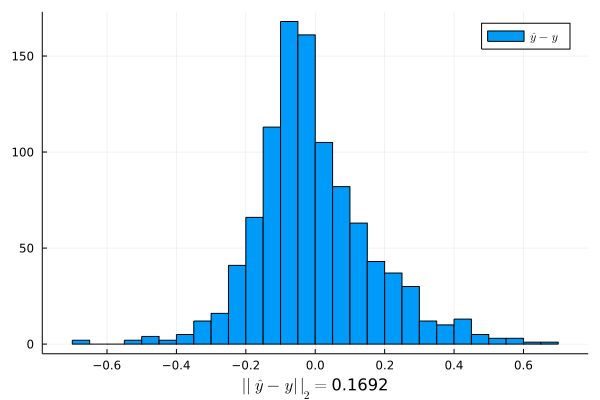

In [110]:
gvm, = semiMAVE.predictor(car_model_mr, Xt, Zt)
ypm = gvm + Zt * car_model_mr.β
em = round(rmsd(ypm, yt), digits = 4)
str = string(L"||\hat{y} - y||_2 = ", "$em")
histogram(yt .- ypm, label = L"\hat{y} - y")
xlabel!(str)